In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path
import glob

0
1
2
3
4
5


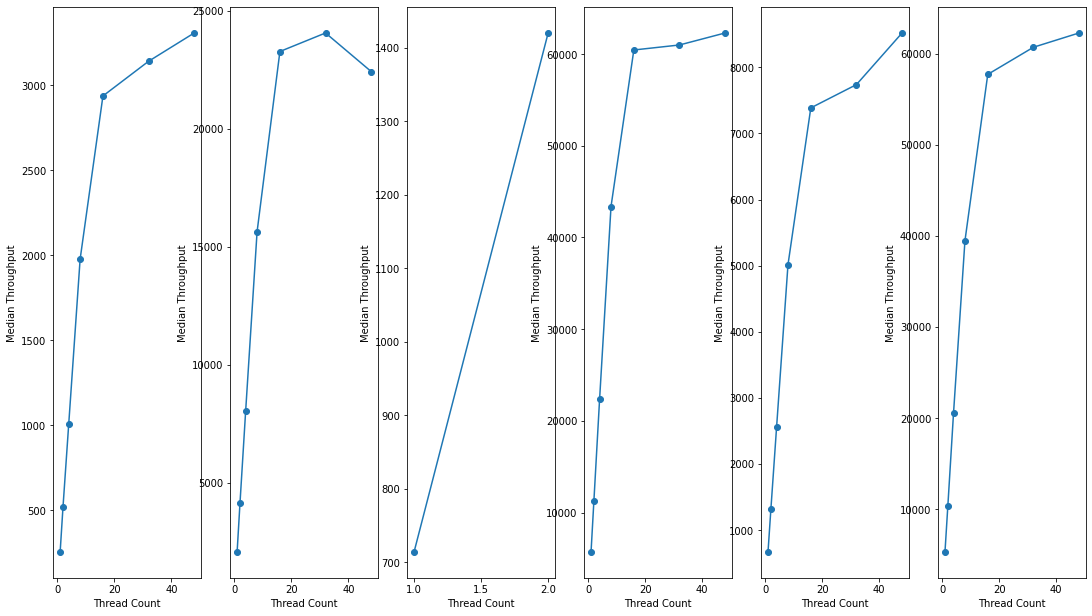

In [2]:
#Creates a plot from every folder in the results directory, where every point on the plots represents a specific .csv file.

x = 0
dirList = glob.glob('../results/*')
fig, axs = plt.subplots(1, len(dirList))
fig.set_size_inches(18.5, 10.5)
for dir in dirList:
    dfs = []
    for file in glob.glob(dir + '/*.csv'):
        dfs.append(pd.read_csv(file))

    aggregateDF = pd.DataFrame(columns=['Thread Count', 'Median Throughput'])
    for i in range(len(dfs)):
        aggregateDF.loc[i] = [dfs[i]['Thread Count'].mean(), dfs[i]['Throughput'].median()]

    aggregateDF = aggregateDF.sort_values(by=['Thread Count'])

    axs[x].set_xlabel('Thread Count')
    axs[x].set_ylabel('Median Throughput')
    axs[x].plot(aggregateDF['Thread Count'], aggregateDF['Median Throughput'], marker='o')
    print(x)
    x += 1